# **Let's Grow More - Data Science Internship**
**Task-4 : Exploratory Data Analysis on Dataset - Terrorism**

---

**Description**:

As a security/defense analyst, try to find out the hot zone of terrorism.


**Dataset-Link: https://bit.ly/2TK5Xn5**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,76,94,96,114,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(df.head())
print(df.tail())

        eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
0  197000000001   1970       7     2  ...      0.0       0.0     0.0      NaN
1  197000000002   1970       0     0  ...      1.0       1.0     1.0      NaN
2  197001000001   1970       1     0  ...     -9.0       1.0     1.0      NaN
3  197001000002   1970       1     0  ...     -9.0       1.0     1.0      NaN
4  197001000003   1970       1     0  ...     -9.0       1.0     1.0      NaN

[5 rows x 135 columns]
            eventid  iyear  imonth  iday  ... INT_IDEO  INT_MISC INT_ANY  related
16576  198207150003   1982       7    15  ...     -9.0       1.0     1.0      NaN
16577  198207150004   1982       7    15  ...     -9.0       0.0    -9.0      NaN
16578  198207150005   1982       7    15  ...      0.0       0.0     0.0      NaN
16579  198207150006   1982       7    15  ...     -9.0       0.0    -9.0      NaN
16580  198207160001   1982       7    16  ...      NaN       NaN     NaN      NaN

[5 rows x 135 c

# **Shape of Dataset**

In [5]:
df.shape   # It shows total no. of rows & columns in dataset.

(16581, 135)

# **Name of 135 columns**

In [6]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

# **Unique elements in Dataset**

In [7]:
df.nunique()

eventid       16581
iyear            14
imonth           13
iday             32
approxdate       19
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related         149
Length: 135, dtype: int64

# **Null values in Dataset**

In [8]:
df.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    16560
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       15876
Length: 135, dtype: int64

# **Info of Dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 17.1+ MB


# **Describing Dataset**

In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,...,claimmode,claim2,claimmode2,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.658100e+04,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,15975.000000,15975.000000,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,2299.000000,16581.000000,16581.000000,16581.000000,16581.000000,26.000000,2.000000,16581.000000,15612.000000,16530.000000,218.000000,157.000000,189.000000,27.000000,17.000000,27.000000,0.0,0.0,0.0,16580.000000,35.000000,0.0,16580.000000,3384.000000,934.000000,...,238.000000,9.000000,8.000000,0.0,0.0,0.0,18.000000,16580.000000,13343.000000,1038.000000,878.000000,145.000000,126.000000,25.00000,22.000000,13830.000000,1369.000000,1458.000000,12406.000000,1339.000000,1321.000000,16580.000000,7652.000000,3.803000e+03,16415.000000,1393.000000,1393.000000,403.000000,289.000000,16316.000000,4.170000e+02,1.0,8.800000e+01,1.0,638.000000,486.000000,16580.000000,16580.000000,16580.000000,16580.000000
mean,1.978029e+11,1977.966045,6.201978,15.155962,0.020445,183.120258,5.524878,27.875821,-28.932087,1.253543,0.010494,0.988481,0.990531,0.890477,-1.554912,1.269682,0.042579,0.907665,0.000060,3.166757,4.884615,3.000000,6.913938,40.849154,140.546038,9.389908,50.159236,169.031746,8.444444,53.176471,138.074074,NaN,NaN,NaN,0.041737,0.342857,NaN,0.002413,-11.666076,-80.271949,...,4.399160,0.888889,2.750000,NaN,NaN,NaN,0.444444,6.639867,10.637113,6.364162,9.586560,6.179310,6.595238,6.08000,8.772727,1.400362,0.174580,0.353224,1.313074,0.373413,0.062074,0.617793,3.453999,1.858951e+05,0.084861,-12.320890,0.222541,7.361663,26.937716,0.025619,3.793429e+06,20000.0,1.351280e+06,0.0,2.888715,8.341564,-3.738118,-3.693667,0.263450,-2.668034
std,3.266916e+08,3.270107,3.415697,8.949768,0.141521,170.441089,3.372000,22.109249,55.936993,0.905089,0.101904,0.106711,0.096848,0.312304,3.600439,0.560056,0.201912,0.289506,0.007766,2.010886,2.454823,1.414214,6.249739,30.686157,79.496539,6.835748,28.284160,83.474860,5.866026,24.963061,70.642614,NaN,NaN,NaN,0.199994,0.481594,NaN,0.049060,57.411538,39.316957,...,3.001462,0.333333,2.964071,NaN,NaN,NaN,0.511310,2.404941,7.099814,1.888489,6.900079,2.120236,6.243305,1.28841,7.016523,6.684258,1.021435,2.524430,8.044576,2.368088,0.361929,0.838448,0.527484,1.703579e+06,0.278684,130.737644,4.098203,86.859659,67.460711,0.158001,4.932135e+07,NaN,4.853561e+06,NaN,1.280881,28.437426,4.552678,4.601334,0.657961,4.561017
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,11.000000,1.000000,8.000000,32.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,-99.000000,-99.000000,...,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,1.000000,1.000000,2.000000,2.000000,5.000000,2.000000,5.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,0.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.976092e+11,1976.000000,3.000000,7.000000,0.000000,69.000000,2.000000,13.692880,-86.600964,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000

# **Now we will build a casualties column containing killed & wounded people**

In [11]:
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['casualties'] = df['nkill'] + df['nwound']

# **Now let's visualize the terrorism data**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# **Graph of Terrorist Attacks from year 1970 to1991**

In [13]:
year = df['iyear'].unique()
years_count = df['iyear'].value_counts(dropna=False).sort_index()

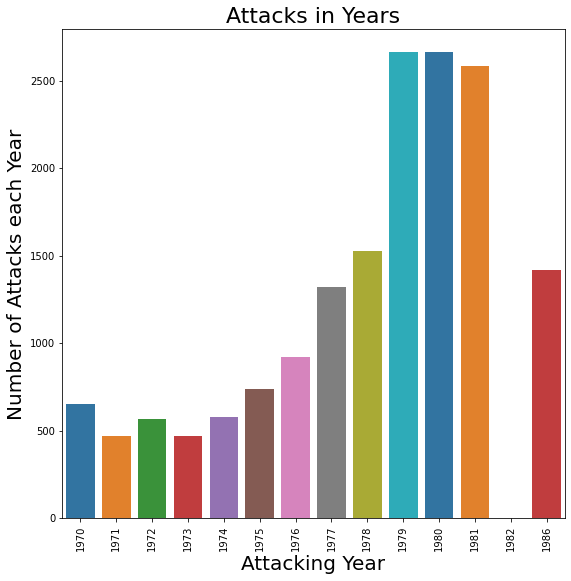

In [15]:
plt.figure(figsize=(9,9))
sns.barplot(x=year,y=years_count, palette='tab10')
plt.xticks(rotation = 90)
plt.xlabel('Attacking Year', fontsize=20)
plt.ylabel('Number of Attacks each Year', fontsize=20)
plt.title('Attacks in Years', fontsize=22)
plt.show()

# **These Graph shows the number of people killed in Terrorist Attacks**

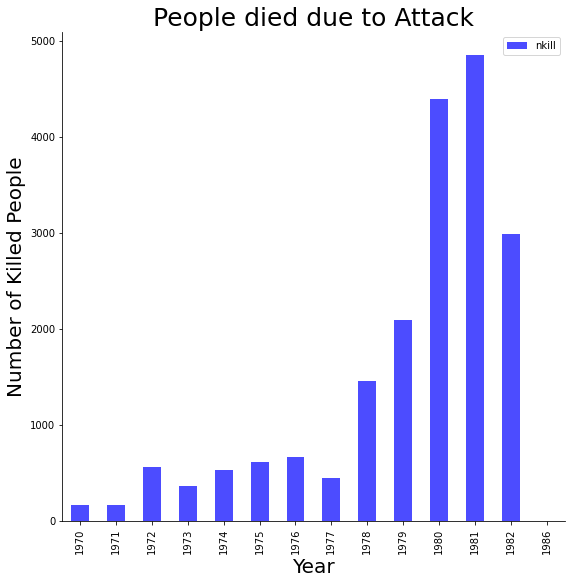

In [17]:
Df = df[['iyear','nkill']].groupby(['iyear']).sum()
fig, ax4 = plt.subplots(figsize=(9,9))
Df.plot(kind='bar', alpha=0.7, ax=ax4, color='blue')
plt.xticks(rotation = 90)
plt.title('People died due to Attack', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Killed People', fontsize=20)

top_side = ax4.spines['top']
top_side.set_visible(False)
right_side = ax4.spines['right']
right_side.set_visible(False)

# **These Graph shows the number of Active Terrorist Groups**

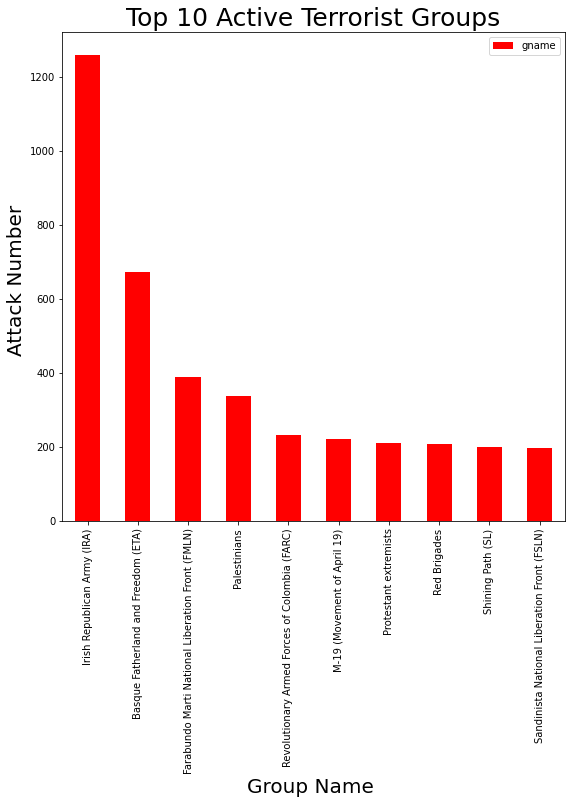

In [19]:
df['gname'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='red',figsize=(9,9))
plt.title('Top 10 Active Terrorist Groups', fontsize=25)
plt.xlabel('Group Name ',fontsize=20)
plt.ylabel('Attack Number ',fontsize=20)
plt.show()

# **Graph of Top 10 Attacked Companies**

Text(0.5, 1.0, 'Name of Attack Type')

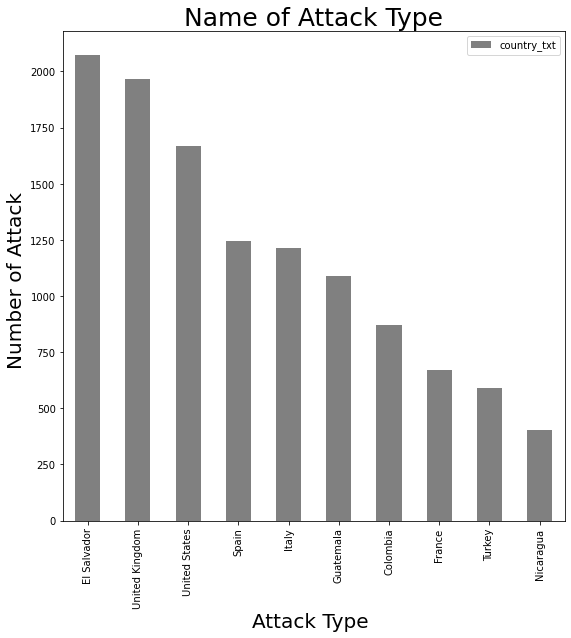

In [22]:
df['country_txt'].value_counts().to_frame().sort_values('country_txt',
  axis=0,ascending=False).head(10).plot(kind='bar',color='gray',figsize=(9,9))
plt.xticks(rotation=90)
plt.xlabel('Attack Type ',fontsize=20)
plt.ylabel('Number of Attack ',fontsize=20)
plt.title('Name of Attack Type', fontsize=25)

# **Graph for types of attacks used by Terrorists**

Text(0.5, 1.0, 'Name of Attack Type')

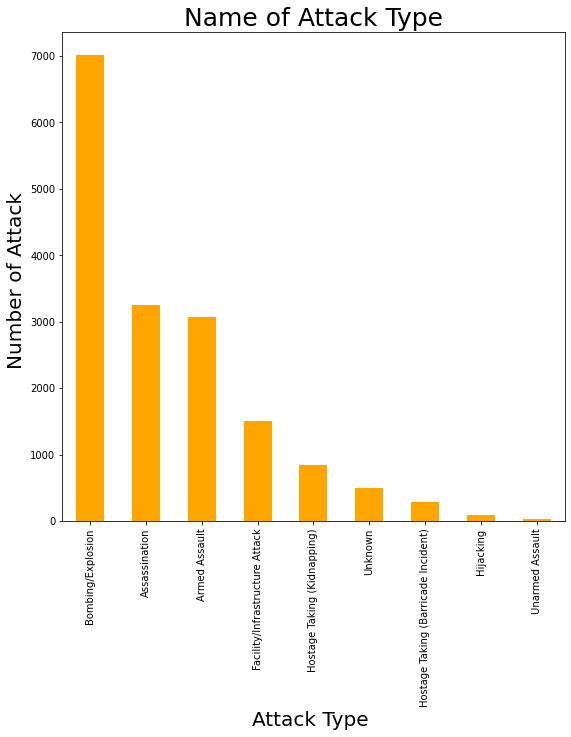

In [24]:
df['attacktype1_txt'].value_counts().plot(kind='bar',
   figsize=(9,9), color='orange')
plt.xticks(rotation=90)
plt.xlabel('Attack Type ',fontsize=20)
plt.ylabel('Number of Attack ',fontsize=20)
plt.title('Name of Attack Type', fontsize=25)

# **Graph to show which sectors are most affected by Terrorist Attacks**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Types of Attack')

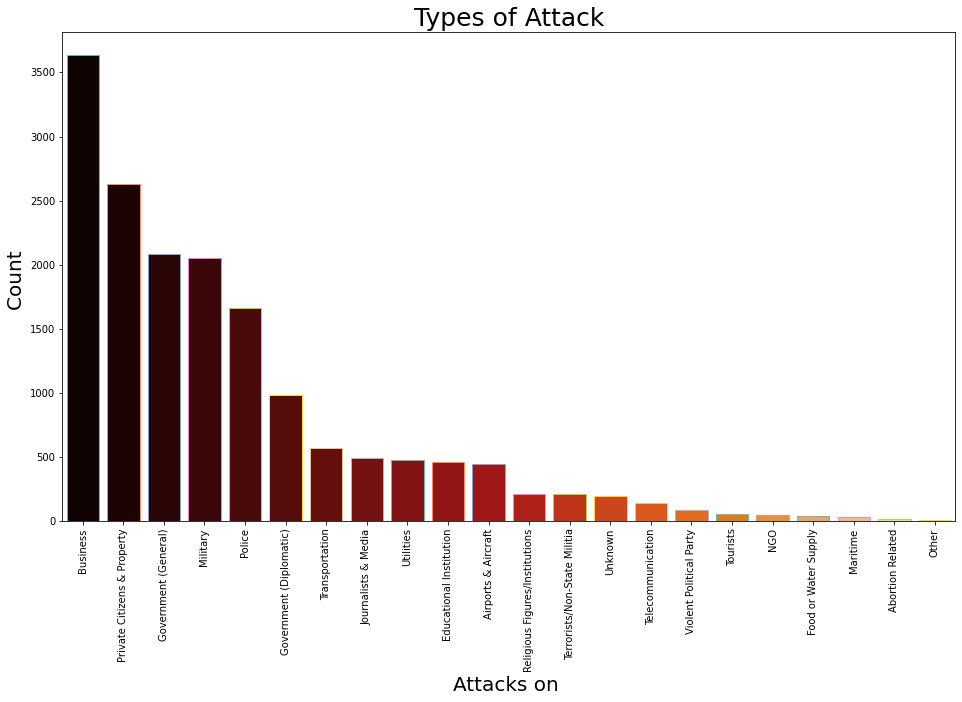

In [26]:
plt.subplots(figsize=(16,9))
sns.countplot(df['targtype1_txt'],order=df['targtype1_txt'].value_counts().index,
    palette='gist_heat',edgecolor=sns.color_palette('Set2'))
plt.xticks(rotation=90)
plt.xlabel('Attacks on ',fontsize=20)
plt.ylabel('Count ',fontsize=20)
plt.title('Types of Attack', fontsize=25)

# **Total Number of People killed in Terrorist Attacks**

In [27]:
kill = df.loc[:, 'nkill']
print('Total Number of People killed in Terrorist Attacks: ', int(sum(kill.dropna())))

Total Number of People killed in Terrorist Attacks:  19367


# **Different types of Terrorist Attacks**

In [28]:
df1 = df.pivot_table(columns='attacktype1_txt', values='nkill',aggfunc='sum')
print(df)

            eventid  iyear  imonth  iday  ... INT_MISC  INT_ANY related  casualties
0      197000000001   1970       7     2  ...      0.0      0.0     NaN         1.0
1      197000000002   1970       0     0  ...      1.0      1.0     NaN         0.0
2      197001000001   1970       1     0  ...      1.0      1.0     NaN         1.0
3      197001000002   1970       1     0  ...      1.0      1.0     NaN         0.0
4      197001000003   1970       1     0  ...      1.0      1.0     NaN         0.0
...             ...    ...     ...   ...  ...      ...      ...     ...         ...
16576  198207150003   1982       7    15  ...      1.0      1.0     NaN         0.0
16577  198207150004   1982       7    15  ...      0.0     -9.0     NaN         0.0
16578  198207150005   1982       7    15  ...      0.0      0.0     NaN         2.0
16579  198207150006   1982       7    15  ...      0.0     -9.0     NaN         1.0
16580  198207160001   1982       7    16  ...      NaN      NaN     NaN     

# **People Killed based on countries**

In [29]:
df2 = df.pivot_table(columns='country', values='nkill', aggfunc='sum')
print(df2)

country   4    5    6    7     8      11   ...   428  499  532     603  604   605
nkill    53.0  0.0  0.0  0.0  22.0  329.0  ...  81.0  1.0  0.0  1964.0  1.0  15.0

[1 rows x 124 columns]


# **Top 10 terrorist groups**

In [30]:
df.gname.value_counts()[1:11]

Irish Republican Army (IRA)                         1259
Basque Fatherland and Freedom (ETA)                  671
Farabundo Marti National Liberation Front (FMLN)     389
Palestinians                                         338
Revolutionary Armed Forces of Colombia (FARC)        232
M-19 (Movement of April 19)                          220
Protestant extremists                                211
Red Brigades                                         207
Shining Path (SL)                                    199
Sandinista National Liberation Front (FSLN)          197
Name: gname, dtype: int64

# **Result:**
---
Highest Number of Attacks took place between **1983 & 1989** with over **4000** attacks.

**Shining Path(SL)** is the most active terrorist group. **Farabundo Marti National Liberation Front (FMLN)** is yet another active group which is mostly active with **(SL)**.

Highest number of Terrorist attacks took place in **Peru** with **El Salvador** in the second place.

Most frequent attack types were **Bombing/Explosion & Armed Assault**.

Most affected areas by Terrorist Attacks are **Buisness & Private Citizens & Military & Government**.
